# Solving for beam deflection #
A beam is a structural element that resists loads and deforms laterally to the beam's axis. The following equation is an ODE that governs beam deflections based on a given load.
$$
\begin{align}
&\frac{d^2}{dx^2}\left(EI\frac{d^2w}{dx^2}\right)=q\\
\end{align}$$ <br>
Where $w$ is the deflection, $EI$ is a mechanical property and $q$ is the loading condition. If the material and cross section do not vary along the beam this can be simplified to the following fourth order ODE.
$$\begin{align}
&\frac{d^4w(x)}{dx^4}=\frac{q(x)}{EI}\\
\end{align}$$<br>
This equation can be integrated to find different stresses and phsyical properties across the beam.
$$
\begin{align}
&\frac{d^3w(x)}{dx^3}=\frac{V(x)}{EI}\\
&\frac{d^2w(x)}{dx^2}=\frac{M(x)}{EI}\\
&\frac{dw(x)}{dx}=\frac{\theta(x)}{EI}\\
\end{align}$$<br>
$V(x)$ is the shear force, $M(x)$ is the moment force, $\theta(x)$ is the rotation of the beam from the undeformed state (horizontal axis). <br><br>
These properties are also used to define boundary conditions of the beam. There are various boundary conditions that can be applied but for this project I will consider a simply supported beam. The boundary conditions for this case are as follows:
$$
\begin{aligned}
M(0)=M(L)=\frac{d^2w(x)}{dx^2}\biggr\rvert_{x=0}&=\frac{d^2w(x)}{dx^2}\biggr\rvert_{x=L}=0\\
w(0)=w(L)&=0\\
\end{aligned}$$
Where $L$ is the length of the beam, such that these boundary conditions are applied at both ends of the beam. The moment boundary condition is considered a Neumann boundary condition while the displacement boundary condition is a Dirichlet boundary condition.

For the loading, I will consider a distributed load and a triangular load. The functions for these loads are as follows:
$$
\begin{align}
q_{distributed}(x)=C\\
q_{triangle}(x)=Cx
\end{align}$$<br>
Where $C$ is a constant. The figures below shows what a distributed and triangular loading conditions on a simply supported beam look like. <br>

<img src="distributed load_1_edit.png" width ="300">
<img src="triangle_load_edited.PNG" width ="300">

By solving the ODE analytically, the deflections for the two loading conditions are as follows:
$$
\begin{align}
y_{distributed}(x)=\frac{Cx}{24EI}(L^3-2Lx^3+x^3)\\
y_{triangular}(x)=\frac{Cx}{360EIL}(7L^4-10L^2x^3+3x^4)
\end{align}$$<br>

Since the problem is a BVP I will use the shooting method and the finite difference method. <br>

#### Shooting Method ####
For the shooting method, since this problem is a fourth order ODE, it first must be expressed as a linear system of first order ODEs. Using the notation $\frac{d^{n}w}{dx^{n}}=w_{nx}$:<br>
The ODE that I want solve is:<br>
$$
w_{xxxx}=q(x)
$$<br>
With the boundary conditions:
$$
\begin{align}
&w(0)=w(L)=0\\
&w_{xx}(0)=w_{xx}(L)=0
\end{align}
$$
Expressed as a linear system of first order ODEs:
<br>$$
    v = \begin{bmatrix} w \\ w_x \\ w_{xx} \\ w_{xxx}\end{bmatrix} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ v_4\end{bmatrix} \quad \Rightarrow \quad v_x = \begin{bmatrix}  w_x \\ w_{xx} \\ w_{xxx} \\ w_{xxxx}\end{bmatrix} = \begin{bmatrix} v_2 \\ v_3 \\ v_4 \\ q(x) \end{bmatrix}
$$<br>
$v_1$ and $v_3$ are the initial values, $v_2$ and $v_4$ are the unknown values. <br>
For the ODE solver I used scipy's ODE integrate function with the Runge Kutta (4)5 Dormand-Prince method (dopri5). The problem should not be stiff therefore an explicit method should be able to solve the problem with no issues. <br><br>

To implement the shooting method there are four values needed to solve the IVP, two of them are given ($w(0)=0$ and $M(0)=0$) and the other two are to be optimized, namely the shear ($V$) and rotation ($\theta$). These values will be optimized so that the boundary conditions at the end of the beam are achieved ($w(L)=0$ and $M(L)=0$). As this is a root finding problem, I used the secant method due to its superlinear convergence rate. Since there are two unknown values I use the method twice with different values. To find the value for $V(0)$, the root of the moment ($M(L)$) against $V(0)$ was found and to find the value for $\theta(0)$ the root of the displacement ($w(L)$) agaisnt $\theta(0)$ was found. <br><br>

#### Finite Difference Method ####
For the finite difference method, given that the beam is segmented into $N$ nodes (counting from $1$), for nodes 2 to $N-1$  I used the central difference for a fourth order ODE which is as follows:<br>
$$
w_{xxxx}(x_2)=\frac{w(x_{0})-4w(x_{1})+6w(x_{2})-4w(x_{3})+w(x_{4})}{\Delta x^4}
$$<br>
The subscript denotes the node number. An extra 'fictitious' node is added before node $1$ and after node $N$ (i.e. node $0$ and $N+1$) to help impose the Neumann boundary condition of the moment being zero at the ends. This also allows the central difference equation to be used on the second and second last nodes. The central difference of a second order ODE was used to define the Neumann boundary condition. The following equation shows this at centered at node $1$:<br> 
<br>$$
    w_{xx}(x_1)=\frac{w(x_{0})-2w(x_{1})+w(x_{2})}{\Delta x^2} = 0
    $$<br>
Furthermore, the dirchlet boundary condition of $w(0)=w(L)=0$ can be used to simplify this to just the $w(x_{0})$ and $w(x_{2})$ terms. This means the second and second last row row in the $A$ matrix are all zeros except for one column. For the $b$ matrix, the first and last 2 values are zero to meet the Dirichlet and Neumann boundary conditions, the rest are the loads at each point. The matrix below illustrates a sample linear solution for a system of 7 nodes (looks unaligned due to the fractions in the $A$ matrix but there are 9 rows in each of these matrices): 
<br>$$
    \begin{bmatrix}
    \frac{1}{\Delta x^2} &   & \frac{1}{\Delta x^2}   &    & & & & &\\
    & 1 &   &    & & & & &   \\
    \frac{1}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{6}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{1}{\Delta x^4} & & & &   \\
    & \frac{1}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{6}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{1}{\Delta x^4} & & & \\
    & & \frac{1}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{6}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{1}{\Delta x^4} & &  \\
    & & & \frac{1}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{6}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{1}{\Delta x^4} &\\ 
    & & & &\frac{1}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{6}{\Delta x^4} &  \frac{-4}{\Delta x^4} & \frac{1}{\Delta x^4} \\ 
    & & & & & & & 1 & \\
    & & & & & & \frac{1}{\Delta x^2} &  & \frac{1}{\Delta x^2}
    \end{bmatrix} \begin{bmatrix}
        w_0 \\w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \\ w_6 \\ w_7\\ w_8
    \end{bmatrix} = 
    \begin{bmatrix}
        0 \\ 0 \\ q(x_2) \\ q(x_3) \\ q(x_4) \\ q(x_5) \\ q(x_6) \\ 0 \\ 0
    \end{bmatrix}.
$$ <br>
In the implementation I will also compare the convergence of the solution as the number of nodes increases.

#### Setting Up General problem ####

For the following problem I will solve a beam with $EI=4176000*38.8/144=1125200 \text{kip-ft}^2$ and a length of $10$ ft. For the distributed load I will use a load of $100 \text{kip-ft}^{-1}$ and for the triangular load, the load will start from $0$ and end at $100 \text{kip-ft}^{-1}$. Plots of each of these loading conditions will be made however, the numpy.testing routine will only be used to check the values for the distributed load. The shooting method will be checked agaisnt the initial values for the shear and moment, which for a distributed load are given by the following equations (rotation is negative due to sign conventions):
$$
\begin{align}
v(0)=\frac{qL}{2}=500\\
\theta(0)=\frac{qL^3}{24}=-4166.67
\end{align}
$$
The finite difference method will be checked agaisnt the largest displacement displacement, which is given by (load is in opposite direction of y-axis therefore a negative deflection is obtained): 
$$
w_{max}=\frac{5qL^4}{384EI}=-1.66637
$$

#### Shooting Method ####

##### General functions and Integration function ######

The following code block is the integrating function and some general functions. Scipy integrate was used to solve the system of ODEs.

In [1]:
from __future__ import print_function
import scipy.integrate as integrate
import numpy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%precision 16

#Constants
EI=29000*38.8/144
L=10

#Define functions for load
def q_constant(x):
    """
    Function for distributed load given distance along beam in ft, note for distributed load the loading is independent 
    to the distance along the beam 
    
    Inputs:x = distance from edge of beam
    Outputs:load in kip/ft
    """
    return -100
def q_triangle(x):
    """
    Function for triangular load given distance along beam in ft
    
    Inputs: x = distance from edge of beam  
    Outputs: q = load in kip/ft
    """
    return -10*x
def w_exact_constant(q,EI,L,x):
    """
    Function for exact displacements for distributed load on simply suppored beam in ft
    
    Inputs:x = distance from edge of beam in ft
           q = load in kip/ft
           EI = Mechanical constant
           L = Total length of beam
    Outputs:w = Displacement at point x
    """
    return -q*x*(L**3-2*L*x**2+x**3)/(24*EI)
def w_exact_triangle(q,EI,L,x):
    """
    Function for exact displacements for triangular load on simply suppored beam in ft
    
    Inputs:x = distance from edge of beam in ft
           q = load in kip/ft
           EI = Mechanical constant
           L = Total length of beam
    Outputs:w = Displacement at point x
    """
    return -q*x*(7*L**4-10*(L**2)*(x**2)+3*x**4)/(360*EI*L)

#Define function for RHS
def f_dist(x, u):
    """
    RHS for ODE solver matrix for distributed loads
    
    Inputs:x = distance from edge of beam in ft
           u = matrix containing w, w_x, w_xx, w_xxx 
    Outputs:v' = RHS for ODE solver
    """
    return numpy.array([u[1],u[2],u[3],q_constant(x)]) 

def f_triangle(x, u):
    """
    RHS for ODE solver matrix for triangular loads
    
    Inputs:x = distance from edge of beam in ft
           u = matrix containing w, w_x, w_xx, w_xxx 
    Outputs:v' = RHS for ODE solver
    """
    return numpy.array([u[1],u[2],u[3],q_triangle(x)]) 

#Define integrate function
def integrate_fx(w_0,theta_0,m_0,v_0,f,N):
    """
    Function that integrates system of ODEs, outputs solution for displacements, rotations, moments and shear 
    Code is adapted from the jupyter notebook 16_ODE_BVP
    
    Inputs:w_0 = Initial displacement
           theta_0 = Initial rotation
           m_0 = Initial moment
           v_0 = Initial Shear
           N = Number of nodes
    Outputs:u = matrix with displacements, rotations, moments and shears across the beam
    """
    #Set up nodes
    x = numpy.linspace(0, int(L), int(N))
    
    #Set up solution matrix (u) and initial variables, u[1,0] and u[3,0] are the guesses
    u = numpy.empty((4, N))
    u[0, 0] = w_0
    u[1, 0] = theta_0
    u[2, 0] = m_0
    u[3, 0] = v_0

    #Set up integrator
    
    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(u[:, 0])

    for (i, x_output) in enumerate(x[1:]):
        integrator.integrate(x_output)
        if not integrator.successful():
           raise Exception("Integration Failed!")
        u[:, i + 1] = integrator.y
    return u/EI

##### Implementing the shooting method #####

The code block below implements the shooting method optimized using the secant method. Plot below shows the displacement of the exact solution and the shooting method using 50 Nodes. A numpy.testing routine is used to verify the initial shear and rotation with the analytical solution.

Solutions for v(0) and theta(0) are similar to analytical solutions!
Final initial variables, v_0= 499.999999999975  theta_0= -4166.666666669653
Maximum Deflection of  -1.6655376426542208  at x= 5.1020408163265305


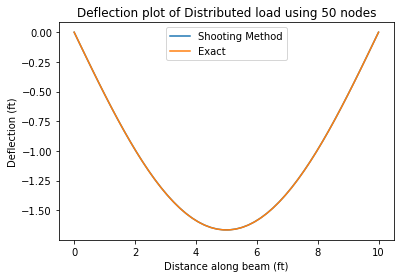

In [2]:
#Number of Nodes
N=50
N_exact=100
x = numpy.linspace(0, int(L), int(N))
x_exact = numpy.linspace(0, int(L), int(N_exact))
#Boundary conditions
m_0=0
m_L=0
w_0=0
w_L=0

#Initial Guesses
v_0=1
theta_0=1 

#Implement shooting method optimized with Secant Method
max_iter_v = 100
max_iter_t = 100
        
tol=1e-10
#Initialize brackets for Secant Method
x_0=v_0
x_1=v_0+1
t_0=theta_0
t_1=theta_0+1

sol_array = []
for k in range(1, max_iter_v + 1):
    
    #Implement Secant method for moment against shear
    f_x_0=integrate_fx(w_0,theta_0,m_0,x_0,f_dist,N)[2][-1]
    f_x_1=integrate_fx(w_0,theta_0,m_0,x_1,f_dist,N)[2][-1]
    
    x_2 = x_1 - f_x_1 * (x_1 - x_0) / (f_x_1 - f_x_0)
    f_x_2=integrate_fx(w_0,theta_0,m_0,x_2,f_dist,N)[2][-1]
    err=numpy.abs(f_x_2)
    sol_array.append(x_2)
    if err < tol:
        break
    x_0 = x_1
    x_1 = x_2
    
    if k == max_iter_v:
        warnings.warn('Maximum number of steps exceeded for Secant Method (Moment-Shear)')
                       
for j in range(1, max_iter_t + 1):

    #Implement Secant method for deflection against rotation
    f_x_0t=integrate_fx(w_0,t_0,m_0,x_2,f_dist,N)[0][-1]
    f_x_1t=integrate_fx(w_0,t_1,m_0,x_2,f_dist,N)[0][-1]

    t_2 = t_1 - f_x_1t * (t_1 - t_0) / (f_x_1t - f_x_0t)
    f_x_2t=integrate_fx(w_0,t_2,m_0,x_2,f_dist,N)[0][-1]
    err=numpy.abs(f_x_2t)
    sol_array.append(f_x_2t)
    if err < tol:
        break
    t_0 = t_1
    t_1 = t_2
    #
    if j == max_iter_t:
        warnings.warn('Maximum number of steps exceeded for Secant Method (Deflection-Rotation)')

numpy.testing.assert_allclose(500, x_2, rtol=1e-5)
numpy.testing.assert_allclose(-4166.666667, t_2, rtol=1e-3)
print("Solutions for v(0) and theta(0) are similar to analytical solutions!")
print('Final initial variables, v_0=',x_2,' theta_0=',t_2)
sol=integrate_fx(w_0,t_2,m_0,x_2,f_dist,N)
print('Maximum Deflection of ',min(sol[0]),' at x=',x[numpy.where(sol[0]==min(sol[0]))[0][0]])

plt.plot(x,sol[0,:],label='Shooting Method')
plt.plot(x_exact,w_exact_constant(100,EI,L,x_exact),label='Exact')
plt.xlabel('Distance along beam (ft)')
plt.ylabel('Deflection (ft)')
plt.title('Deflection plot of Distributed load using 50 nodes')
plt.legend()
plt.show()

This can be reproduced with a triangular load.

Final initial variables, v_0= 166.66666666667268  theta_0= -1944.444444444108
Maximum Deflection of  -0.8343548966333644  at x= 5.1020408163265305


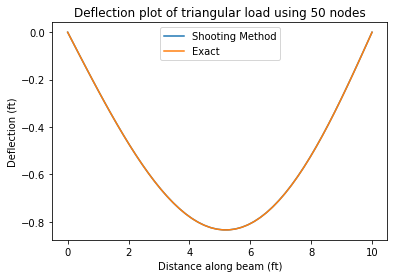

In [3]:
#Initialize brackets for Secant Method
x_0=v_0
x_1=v_0+1
t_0=theta_0
t_1=theta_0+1

sol_array = []
for k in range(1, max_iter_v + 1):
    
    #Implement Secant method for moment against shear
    f_x_0=integrate_fx(w_0,theta_0,m_0,x_0,f_triangle,N)[2][-1]
    f_x_1=integrate_fx(w_0,theta_0,m_0,x_1,f_triangle,N)[2][-1]
    
    x_2 = x_1 - f_x_1 * (x_1 - x_0) / (f_x_1 - f_x_0)
    f_x_2=integrate_fx(w_0,theta_0,m_0,x_2,f_triangle,N)[2][-1]
    err=numpy.abs(f_x_2)
    sol_array.append(x_2)
    if err < tol:
        break
    x_0 = x_1
    x_1 = x_2
    
    if k == max_iter_v:
        warnings.warn('Maximum number of steps exceeded for Secant Method (Moment-Shear)')#
                       
for j in range(1, max_iter_t + 1):

    #Implement Secant method for deflection against rotation
    f_x_0t=integrate_fx(w_0,t_0,m_0,x_2,f_triangle,N)[0][-1]
    f_x_1t=integrate_fx(w_0,t_1,m_0,x_2,f_triangle,N)[0][-1]

    t_2 = t_1 - f_x_1t * (t_1 - t_0) / (f_x_1t - f_x_0t)
    f_x_2t=integrate_fx(w_0,t_2,m_0,x_2,f_triangle,N)[0][-1]
    err=numpy.abs(f_x_2t)
    sol_array.append(f_x_2t)
    if err < tol:
        break
    t_0 = t_1
    t_1 = t_2
    #
    if j == max_iter_t:
        warnings.warn('Maximum number of steps exceeded for Secant Method (Deflection-Rotation)')

print('Final initial variables, v_0=',x_2,' theta_0=',t_2)
sol=integrate_fx(w_0,t_2,m_0,x_2,f_triangle,N)
print('Maximum Deflection of ',min(sol[0]),' at x=',x[numpy.where(sol[0]==min(sol[0]))[0][0]])

plt.plot(x,sol[0,:],label='Shooting Method')
plt.plot(x_exact,w_exact_triangle(100,EI,L,x_exact),label='Exact')
plt.xlabel('Distance along beam (ft)')
plt.ylabel('Deflection (ft)')
plt.title('Deflection plot of triangular load using 50 nodes')
plt.legend()
plt.show()

#### Finite Difference Method ####

The code block below is a function that produces uses the displacement using the finite difference method. The code was adapted from the 16_ODE_BVP notebook.

In [4]:
from scipy.sparse import diags

def fdm(x,L,n,q,EI):
    """
    Function solves for deflections using the finite difference method. 
    
    Inputs:x = List of nodes
           L = Length of beam
           n = number of nodes
           q = loading condition
           EI = Mechanical constants
    Outputs:u = matrix with displacements at each node
    """
    dx=x[1]-x[0]
    A_mat=diags([1, -4, 6, -4, 1], [-2, -1, 0, 1, 2], shape=(n+2, n+2)).toarray()
    A_mat=A_mat/(dx**4)
    #Create Displacement boundary conditions (Dirichlet b.c.)
    bc_w_0=numpy.zeros(n+2)
    bc_w_0[1]=1
    bc_w_l=numpy.zeros(n+2)
    bc_w_l[-2]=1
    
    #Create Moment boundary conditions (Neumann b.c.)
    bc_m_0=numpy.zeros(n+2)
    bc_m_0[0]=1/(dx**2)
    bc_m_0[2]=1/(dx**2)
    bc_m_l=numpy.zeros(n+2)
    bc_m_l[-1]=1/(dx**2)
    bc_m_l[-3]=1/(dx**2)

    #Apply b.c. to A matrix
    A_mat[1]=bc_w_0
    A_mat[0]=bc_m_0
    A_mat[-2]=bc_w_l
    A_mat[-1]=bc_m_l

    #Create b matrix
    b_mat_fx=numpy.vectorize(q)
    b_mat=b_mat_fx(x)
    b_mat[0]=0
    b_mat[-1]=0
    b_mat=numpy.insert(b_mat,0,0,axis=0)
    b_mat=numpy.append(b_mat,0)
    U=numpy.linalg.solve(A_mat, b_mat)
    return U[1:-1]/EI

Below is a plot of the displacements using the finite difference method for a distributed load.  A numpy.testing routine is used to check the maximum deflection. 

Maximum Deflection of  -1.6660926368710574  at x= 5.1020408163265305


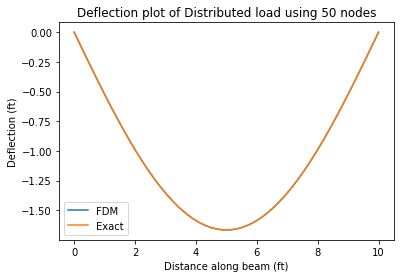

In [5]:
n=50
x=numpy.linspace(0,L,n)
x_e=numpy.linspace(0,L,100)
Fdm_dist=fdm(x,L,n,q_constant,EI)
plt.plot(x,Fdm_dist,label='FDM')
plt.plot(x_e,w_exact_constant(100,EI,L,x_e),label='Exact')
plt.xlabel('Distance along beam (ft)')
plt.ylabel('Deflection (ft)')
plt.title('Deflection plot of Distributed load using 50 nodes')
plt.legend()
numpy.testing.assert_allclose(-5*10**6/(384*EI),min(Fdm_dist) , rtol=1e-3)
print('Maximum Deflection of ',min(Fdm_dist),' at x=',x[numpy.where(Fdm_dist==min(Fdm_dist))[0][0]])

Once again this can also be done with a triangular load.

Maximum Deflection of  -0.8346342814784419  at x= 5.1020408163265305


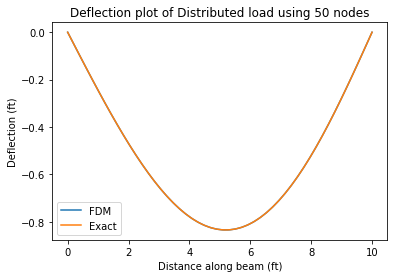

In [6]:
n=50
x=numpy.linspace(0,L,n)
x_e=numpy.linspace(0,L,100)
Fdm_triangle=fdm(x,L,n,q_triangle,EI)
plt.plot(x,Fdm_triangle,label='FDM')
plt.plot(x_e,w_exact_triangle(100,EI,L,x_e),label='Exact')
plt.xlabel('Distance along beam (ft)')
plt.ylabel('Deflection (ft)')
plt.title('Deflection plot of Distributed load using 50 nodes')
plt.legend()
print('Maximum Deflection of ',min(Fdm_triangle),' at x=',x[numpy.where(Fdm_triangle==min(Fdm_triangle))[0][0]])

#### Error comparison ####
To compare the errors between these solutions the area under the curve is compared bewteen the methods and the analytical solution. The area for the shooting method and the finite difference method can be found by summing the trapezoidal area between each node. The analytical solution was found by integrating the displacement with respect to x and evaluating from 0 to L. For a distributed load this is given by:<br>
<br>$$
    \int_{0}^L w_{distributed} = \frac{L^5q}{120EI}
    $$<br>
Code below is a function for evaluating the area under a function using the trapezoidal method.

In [7]:
def trapezoid_area(f,x):
    """
    Function evaluates trapezoidal area under curve.
    
    Inputs:f = List of y values
           x = List of x values
    Outputs:area = Total area
    """
    dx=x[1]-x[0]
    area=0
    for i in range(len(f)-1):
        area=abs(0.5*(f[i+1]+f[i])*dx)+area
    return area

The following code is the shooting method code adapted to find the area given the number of nodes.

In [8]:
def shooting_area(N):
    """
    Adapted shooting method function to calculate area under curve using trapezoidal equation
    
    Inputs:N = Number of nodes
    Outputs:area = Total trapezoidal area under curve using shooting method
    """
    x = numpy.linspace(0, int(L), int(N))
    #Boundary conditions
    m_0=0
    m_L=0
    w_0=0
    w_L=0

    #Initial Guesses
    v_0=1
    theta_0=1 

    #Implement shooting method optimized with Secant Method
    max_iter_v = 100
    max_iter_t = 100
    
    tol=1e-10
    #Initialize brackets for Secant Method
    x_0=v_0
    x_1=v_0+1
    t_0=theta_0
    t_1=theta_0+1

    sol_array = []
    for k in range(1, max_iter_v + 1):

        #Implement Secant method for moment against shear
        f_x_0=integrate_fx(w_0,theta_0,m_0,x_0,f_dist,N)[2][-1]
        f_x_1=integrate_fx(w_0,theta_0,m_0,x_1,f_dist,N)[2][-1]

        x_2 = x_1 - f_x_1 * (x_1 - x_0) / (f_x_1 - f_x_0)
        f_x_2=integrate_fx(w_0,theta_0,m_0,x_2,f_dist,N)[2][-1]
        err=numpy.abs(f_x_2)
        sol_array.append(x_2)
        if err < tol:
            break
        x_0 = x_1
        x_1 = x_2

        if k == max_iter_v:
            warnings.warn('Maximum number of steps exceeded for Secant Method (Moment-Shear)')#

    for j in range(1, max_iter_t + 1):

        #Implement Secant method for deflection against rotation
        f_x_0t=integrate_fx(w_0,t_0,m_0,x_2,f_dist,N)[0][-1]
        f_x_1t=integrate_fx(w_0,t_1,m_0,x_2,f_dist,N)[0][-1]

        t_2 = t_1 - f_x_1t * (t_1 - t_0) / (f_x_1t - f_x_0t)
        f_x_2t=integrate_fx(w_0,t_2,m_0,x_2,f_dist,N)[0][-1]
        err=numpy.abs(f_x_2t)
        sol_array.append(f_x_2t)
        if err < tol:
            break
        t_0 = t_1
        t_1 = t_2
        #
        if j == max_iter_t:
            warnings.warn('Maximum number of steps exceeded for Secant Method (Deflection-Rotation)')
    sol=integrate_fx(w_0,t_2,m_0,x_2,f_dist,N)
    area=trapezoid_area(sol[0,:],x)
    return area

A similar function can be written for the finite difference method

In [9]:
def fdm_area(N):
    """
    Function to calculate area under curve of finite difference method using trapezoidal equation
    
    Inputs:N = Number of nodes
    Outputs:area = Total trapezoidal area under curve using shooting method
    """
    x = numpy.linspace(0, int(L), int(N))
    f = fdm(x,L,N,q_constant,EI)
    area=trapezoid_area(f,x)
    return area

Finally, the code block below produces a plot comparing absolute errors between the two methods.

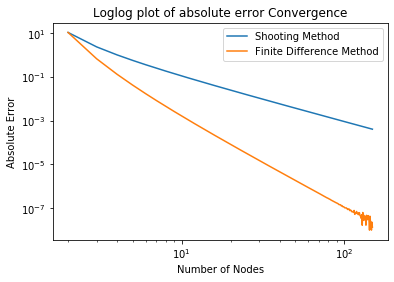

In [10]:
shooting_errors=[]
fdm_errors=[]
for i in range(2,150):
    exact=L**5*100/(120*EI)
    shooting_errors.append(abs(exact-shooting_area(i)))
    fdm_errors.append(abs(exact-fdm_area(i)))
    
plt.loglog(range(2,150),shooting_errors,label='Shooting Method')
plt.loglog(range(2,150),fdm_errors, label='Finite Difference Method')
plt.title('Loglog plot of absolute error Convergence')
plt.xlabel('Number of Nodes')
plt.ylabel('Absolute Error')
plt.legend()